In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=fbbbbd988f8625a321616ba6b5228a0e22c88c308a85ffe79db01c229663b38d
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# Create a Spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DiabetesAnalysis").getOrCreate()

# Read data from a CSV file into a Spark DataFrame
file_path = "dbfs:/FileStore/shared_uploads/diabetes_risk_prediction_dataset.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Handle missing values (drop rows with missing values)
df = df.na.drop()

# Display basic information about the DataFrame
df.printSchema()
df.show()

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# Create a Spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DiabetesPrediction").getOrCreate()

# Read data from a CSV file into a pandas DataFrame
file_path = "diabetes_risk_prediction_dataset.csv"
df_pd = pd.read_csv(file_path)

# Convert pandas DataFrame to a Spark DataFrame
df = spark.createDataFrame(df_pd)

# Handle missing values
df = df.na.drop()

# Display basic information about the DataFrame
df.printSchema()
df.show()



root
 |-- Age: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Polyuria: string (nullable = true)
 |-- Polydipsia: string (nullable = true)
 |-- sudden weight loss: string (nullable = true)
 |-- weakness: string (nullable = true)
 |-- Polyphagia: string (nullable = true)
 |-- Genital thrush: string (nullable = true)
 |-- visual blurring: string (nullable = true)
 |-- Itching: string (nullable = true)
 |-- Irritability: string (nullable = true)
 |-- delayed healing: string (nullable = true)
 |-- partial paresis: string (nullable = true)
 |-- muscle stiffness: string (nullable = true)
 |-- Alopecia: string (nullable = true)
 |-- Obesity: string (nullable = true)
 |-- class: string (nullable = true)

+---+------+--------+----------+------------------+--------+----------+--------------+---------------+-------+------------+---------------+---------------+----------------+--------+-------+--------+
|Age|Gender|Polyuria|Polydipsia|sudden weight loss|weakness|Polyphagia|Genit

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame and display the first 5 rows
df.toPandas().head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
# Display statistical summary of the DataFrame
df.describe().show()

+-------+------------------+------+--------+----------+------------------+--------+----------+--------------+---------------+-------+------------+---------------+---------------+----------------+--------+-------+--------+
|summary|               Age|Gender|Polyuria|Polydipsia|sudden weight loss|weakness|Polyphagia|Genital thrush|visual blurring|Itching|Irritability|delayed healing|partial paresis|muscle stiffness|Alopecia|Obesity|   class|
+-------+------------------+------+--------+----------+------------------+--------+----------+--------------+---------------+-------+------------+---------------+---------------+----------------+--------+-------+--------+
|  count|               520|   520|     520|       520|               520|     520|       520|           520|            520|    520|         520|            520|            520|             520|     520|    520|     520|
|   mean| 48.02884615384615|  NULL|    NULL|      NULL|              NULL|    NULL|      NULL|          NULL|   

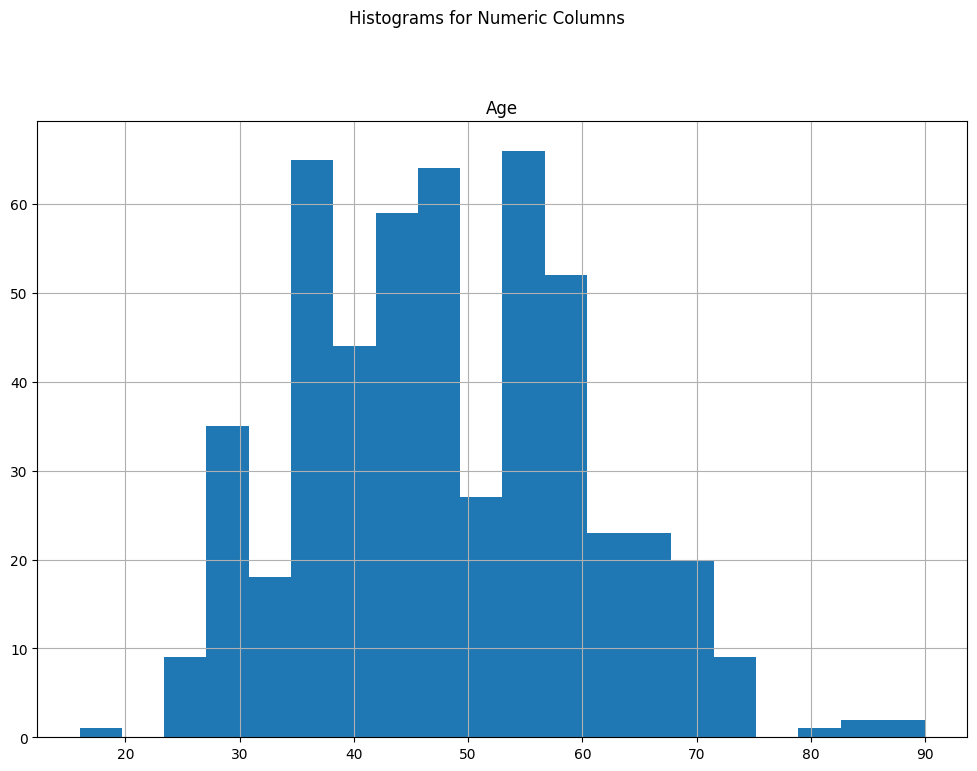

In [ ]:
# 5. Visualize variable distribution using histograms
numeric_cols = ["Age"]
categorical_cols = ["Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity", "class"]

# Histograms for numeric columns
df.select(numeric_cols).toPandas().hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms for Numeric Columns', y=1.02)
plt.show()

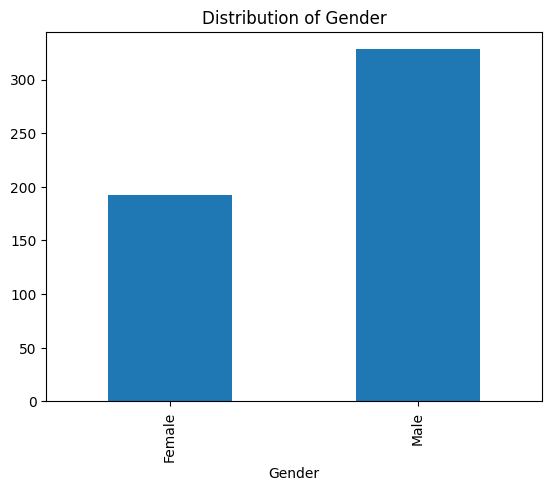

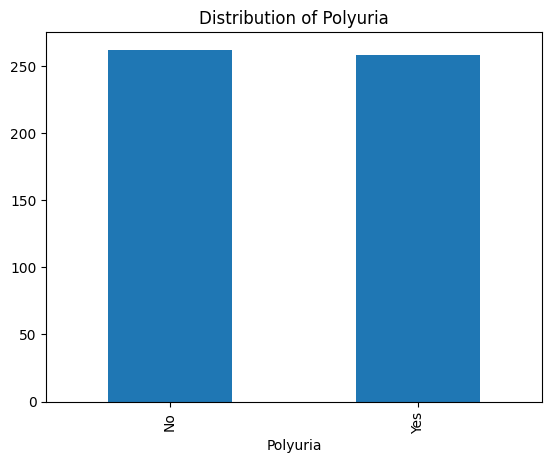

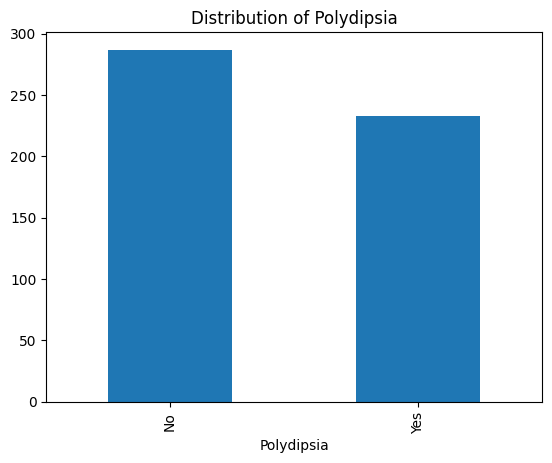

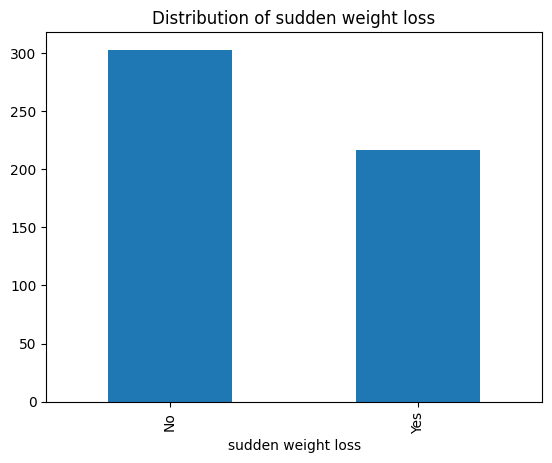

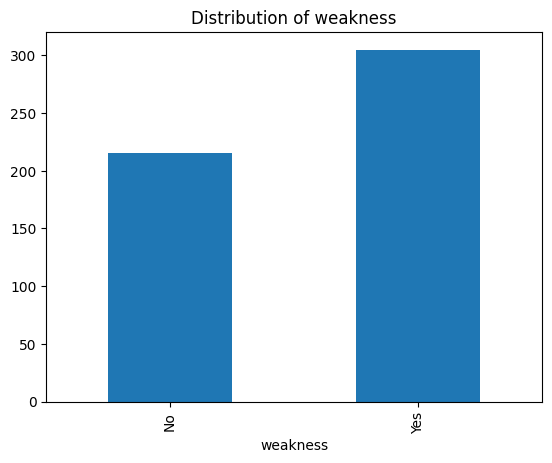

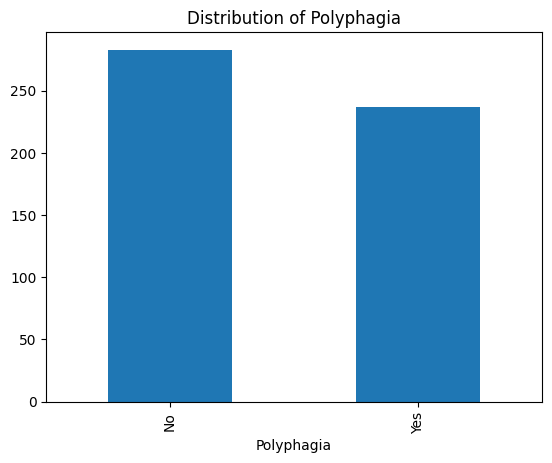

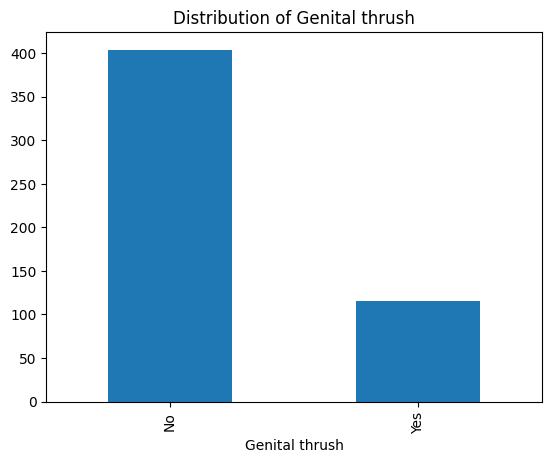

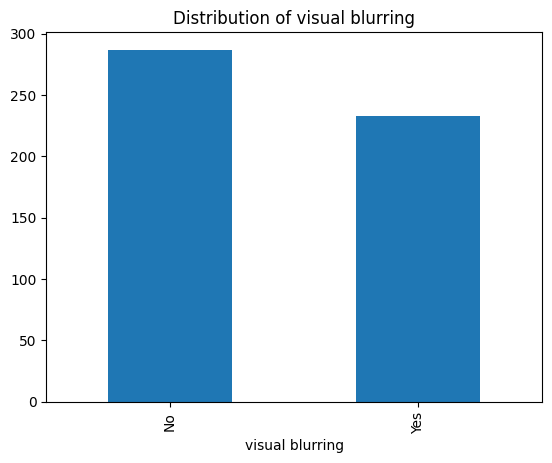

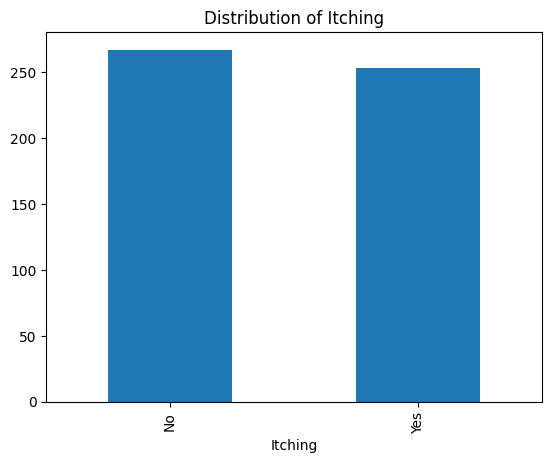

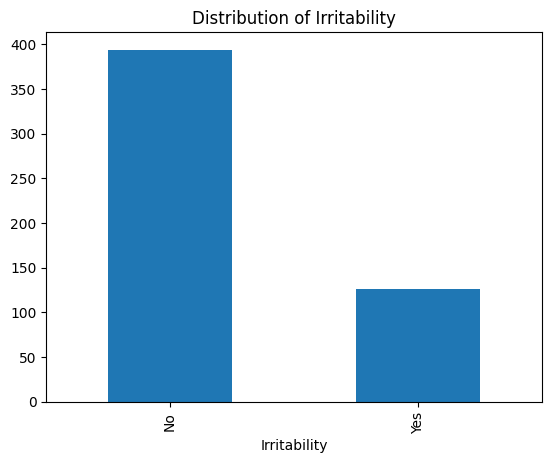

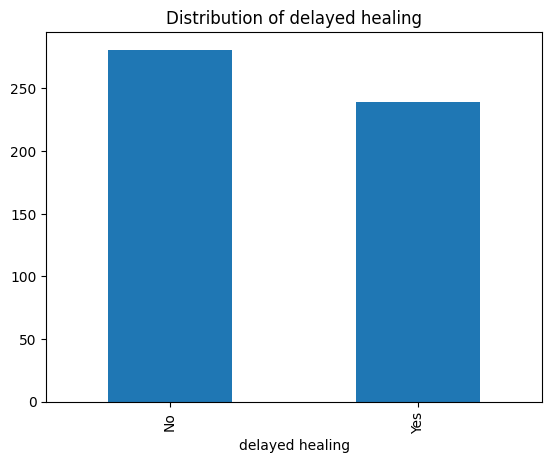

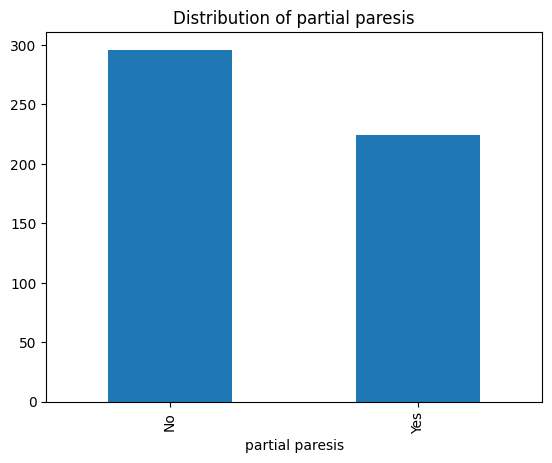

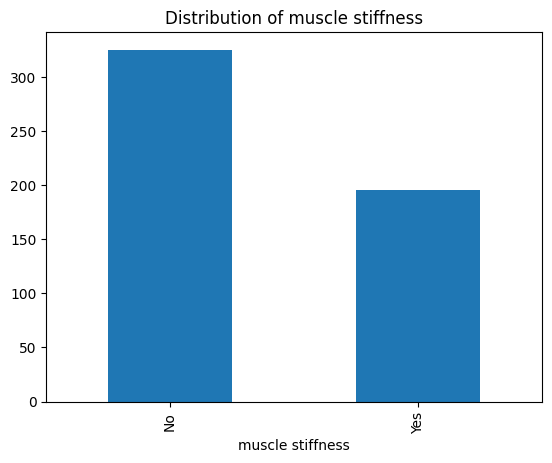

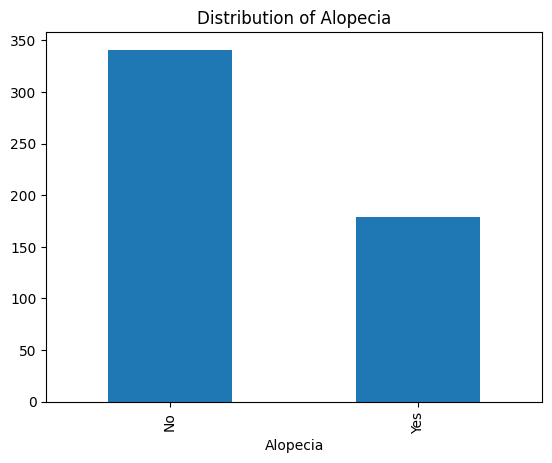

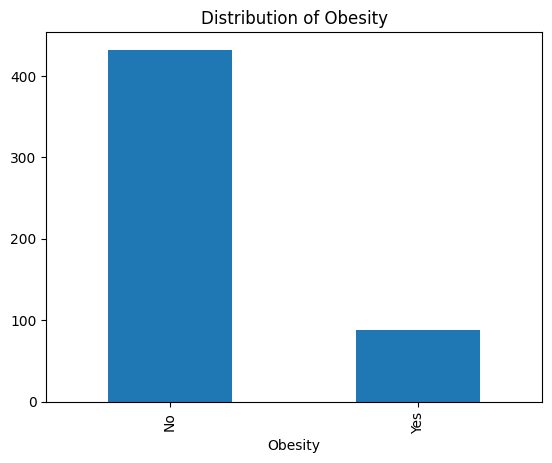

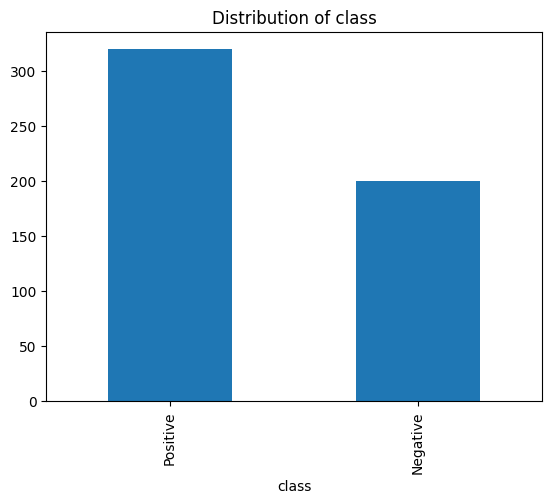

In [ ]:
# Bar plots for categorical columns
for column in categorical_cols:
    df.groupBy(column).count().toPandas().plot(kind='bar', x=column, y='count', legend=False)
    plt.title(f'Distribution of {column}')
    plt.show()


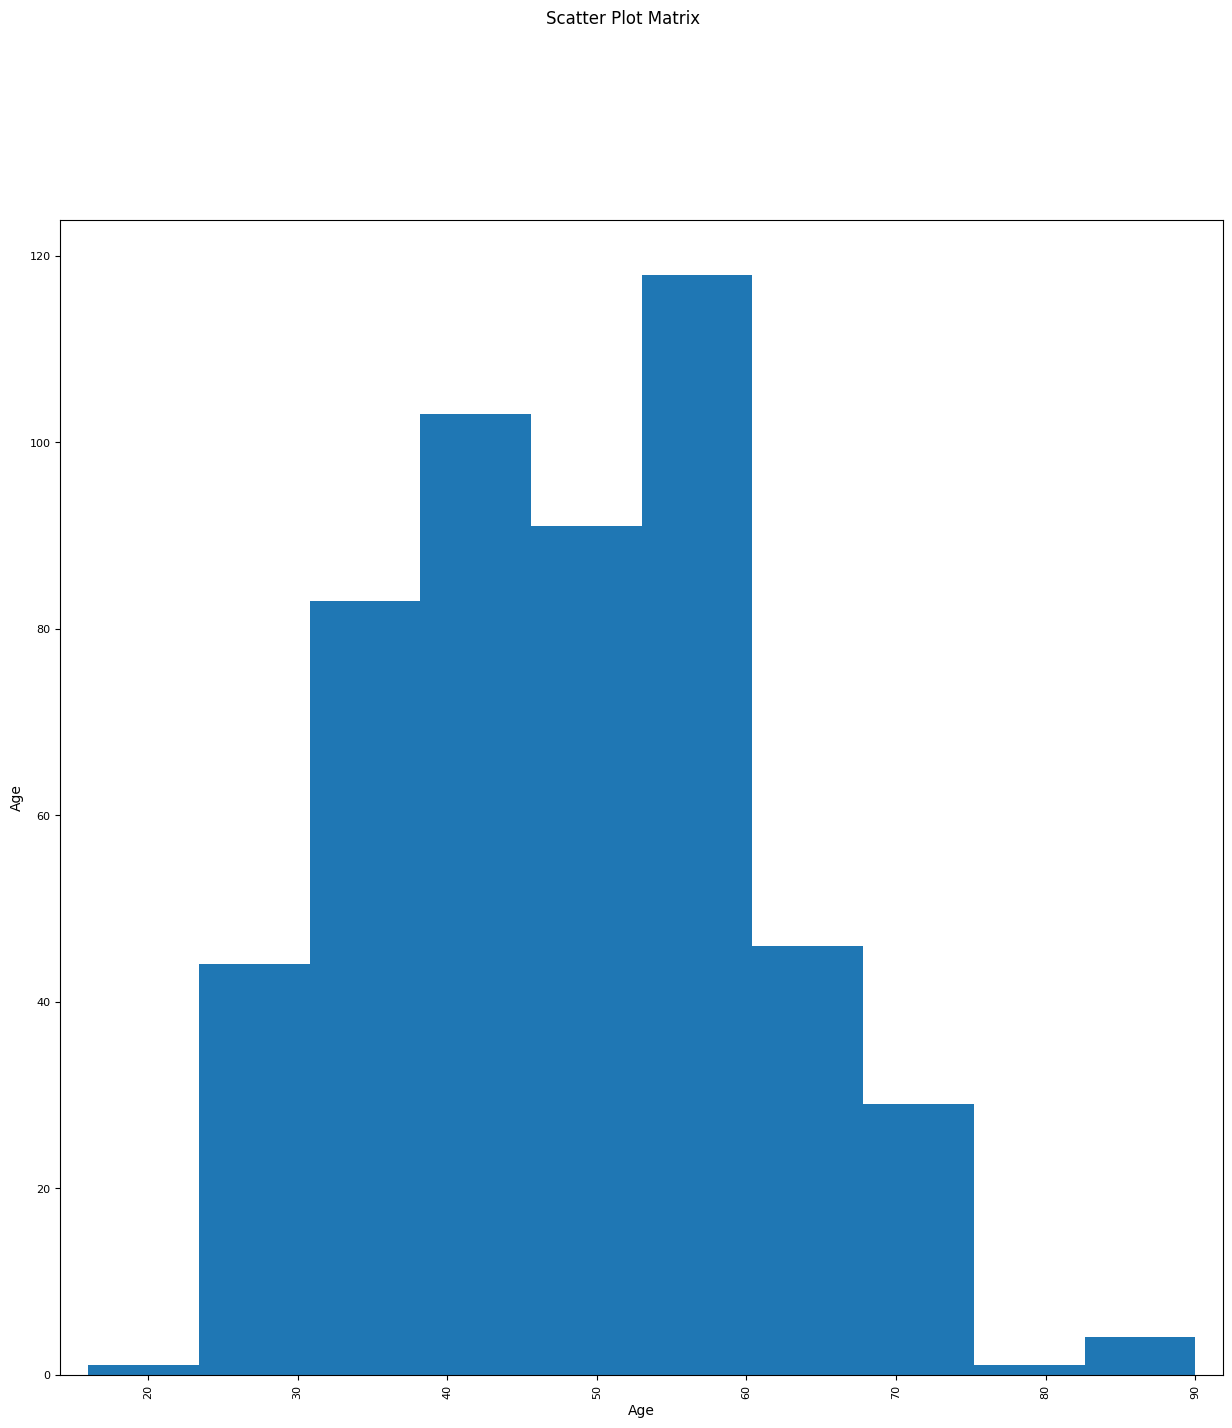

In [ ]:
# ... (your existing code)

# Extract indexed columns that exist in the DataFrame
indexed_columns = [column+"_index" for column in ["Age", "Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"]]
existing_columns = [col_name for col_name in indexed_columns if col_name in df.columns]

# ... (your existing code)

# 6. Visualize correlations between multiple variables using scatter plots
# Scatter plot matrix for selected numeric columns
numeric_cols_for_scatter = ["Age"]
numeric_cols_for_scatter.extend(existing_columns)
scatter_df = df.select(numeric_cols_for_scatter).toPandas()

scatter_matrix = pd.plotting.scatter_matrix(scatter_df, figsize=(15, 15), diagonal='hist', marker='o', alpha=0.5)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()


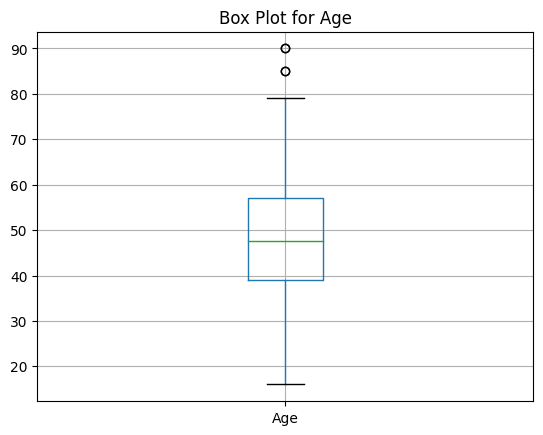

In [ ]:
# 7. Box plots for selected numeric columns
numeric_cols_for_boxplot = ["Age"]
numeric_cols_for_boxplot.extend(existing_columns)

# Box plots for numeric columns
for column in numeric_cols_for_boxplot:
    df.select(column).toPandas().boxplot()
    plt.title(f'Box Plot for {column}')
    plt.show()


Logistic Regression Results:
+--------+-----------+----------+--------------------+
|   class|class_index|prediction|         probability|
+--------+-----------+----------+--------------------+
|Positive|        0.0|       1.0|[0.61050570840225...|
|Positive|        0.0|       1.0|[0.53301729526605...|
|Positive|        0.0|       1.0|[0.63468081755056...|
|Positive|        0.0|       1.0|[0.53301729526605...|
|Positive|        0.0|       0.0|[0.70464738419400...|
+--------+-----------+----------+--------------------+
only showing top 5 rows

Logistic Regression Loss: 0.24423076923076925
Random Forest Results:
+--------+-----------+----------+--------------------+
|   class|class_index|prediction|         probability|
+--------+-----------+----------+--------------------+
|Positive|        0.0|       0.0|[0.63590007307392...|
|Positive|        0.0|       1.0|[0.49669239157369...|
|Positive|        0.0|       0.0|[0.64245007318283...|
|Positive|        0.0|       1.0|[0.24445068875123..

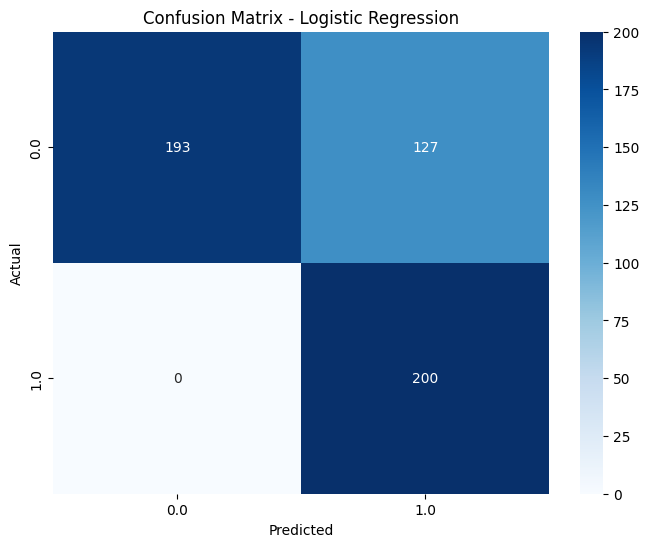

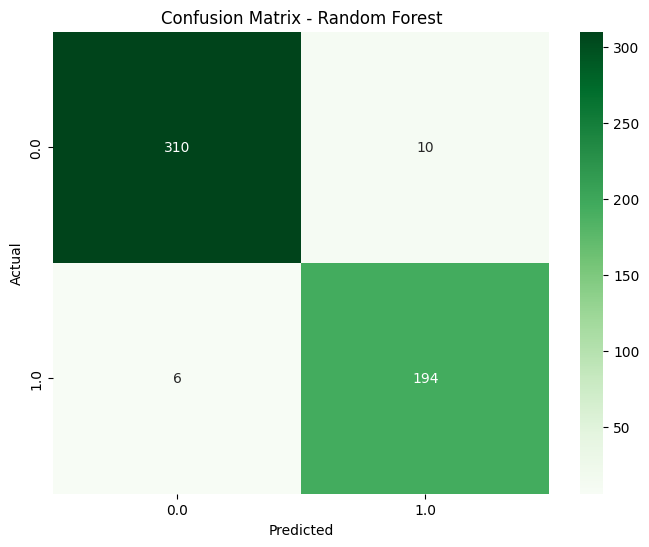

In [ ]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.evaluation import MulticlassClassificationEvaluator



# Define a pipeline for data preprocessing and model training
indexers = []

# Apply StringIndexer to the columns
for column in ["Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity", "class"]:
    output_column = column + "_index"

    # Check if the output column already exists
    if output_column not in df.columns:
        indexer = StringIndexer(inputCol=column, outputCol=output_column).fit(df)
        df = indexer.transform(df)
        indexers.append(indexer)

# Extract indexed columns that exist in the DataFrame
indexed_columns = [column+"_index" for column in ["Age", "Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"]]
existing_columns = [col_name for col_name in indexed_columns if col_name in df.columns]

# Assemble features
assembler = VectorAssembler(inputCols=existing_columns, outputCol="features")

# Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="class_index", maxIter=10, regParam=0.3, elasticNetParam=0.8, threshold=0.3)


# Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="class_index", numTrees=10)

# Create pipelines for Logistic Regression and Random Forest
lr_pipeline = Pipeline(stages=indexers + [assembler, lr])
rf_pipeline = Pipeline(stages=indexers + [assembler, rf])

# Fit the models
lr_model = lr_pipeline.fit(df)
rf_model = rf_pipeline.fit(df)

# Make predictions
lr_predictions = lr_model.transform(df)
rf_predictions = rf_model.transform(df)

# 1. Print results and loss for Logistic Regression
print("Logistic Regression Results:")
lr_predictions.select("class", "class_index", "prediction", "probability").show(5)

evaluator = MulticlassClassificationEvaluator(labelCol="class_index", predictionCol="prediction", metricName="accuracy")
lr_loss = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression Loss: {1.0 - lr_loss}")

# 2. Print results and loss for Random Forest
print("Random Forest Results:")
rf_predictions.select("class", "class_index", "prediction", "probability").show(5)

rf_loss = evaluator.evaluate(rf_predictions)
print(f"Random Forest Loss: {1.0 - rf_loss}")

# 3. Confusion Matrix for Logistic Regression
conf_matrix_lr = lr_predictions.select("class_index", "prediction").toPandas()
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(conf_matrix_lr['class_index'], conf_matrix_lr['prediction'], rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 4. Confusion Matrix for Random Forest
conf_matrix_rf = rf_predictions.select("class_index", "prediction").toPandas()
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(conf_matrix_rf['class_index'], conf_matrix_rf['prediction'], rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap="Greens")
plt.title('Confusion Matrix - Random Forest')
plt.show()


